# Day 05 — Probability & Statistics (Data Behavior)

## Objective
Understand **why real-world data is noisy**, why **loss never reaches zero**,  
and why **machine learning is probabilistic, not exact**.

This notebook explains:
- Statistical behavior of data
- Noise and irreducible error
- Why convergence happens
- Why some formulas (Log Loss, Scaling) are unavoidable

This prevents overfitting, misinterpreting convergence, and future confusion.


## Why Statistics Matter in ML

Even with:
- Correct model
- Correct gradients
- Perfect optimization

Loss does **not** go to zero.

This is not a training failure.
It is a **data reality**.

Statistics explain this reality.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Mean — Center of the Data

The **mean** is the balance point of the data.

ML interpretation:
- The mean is the **best constant prediction**
- Bias terms often converge toward mean effects


In [2]:
data = np.array([2, 4, 6, 8, 10])

manual_mean = sum(data) / len(data)
numpy_mean = np.mean(data)

manual_mean, numpy_mean


(np.float64(6.0), np.float64(6.0))

## Variance — How Spread Out the Data Is

Variance measures how far values spread around the mean.

High variance:
- Data is unstable
- Predictions are harder

Low variance:
- Data is tightly clustered
- Easier to model


In [3]:
manual_variance = sum((data - manual_mean) ** 2) / len(data)
numpy_variance = np.var(data)

manual_variance, numpy_variance


(np.float64(8.0), np.float64(8.0))

## Standard Deviation — Variance You Can Feel

Variance is squared → hard to interpret.

Standard deviation:
- Same units as data
- Typical deviation from the mean

ML engineers think in **standard deviation**, not variance.


In [4]:
numpy_std = np.std(data)
numpy_std


np.float64(2.8284271247461903)

## Normal Distribution

Many real-world measurements follow a **normal (Gaussian) distribution**:
- Sensor readings
- Human behavior
- Aggregated effects

This distribution is symmetric and bell-shaped.


In [5]:
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=10000)


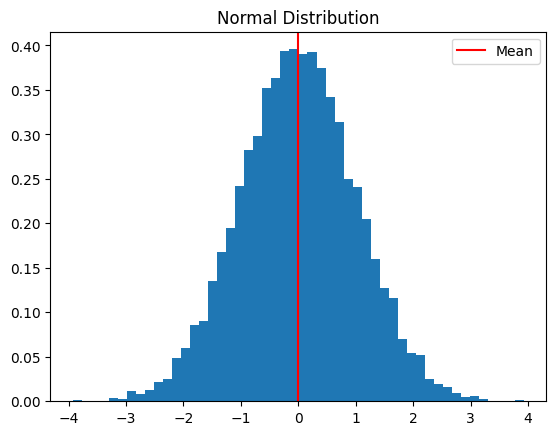

In [14]:
plt.hist(normal_data, bins=50, density=True)
plt.axvline(np.mean(normal_data), color="red", label="Mean")
plt.title("Normal Distribution")
plt.legend()
plt.show()


## 68–95–99.7 Rule

For a normal distribution:
- ~68% of values lie within 1 standard deviation
- ~95% within 2 standard deviations
- ~99.7% within 3 standard deviations

This explains **typical error ranges** in ML predictions.


## Noise — The Irreducible Error

Noise comes from:
- Measurement error
- Unobserved variables
- Random environmental effects

Noise is **not learnable**.
Trying to fit noise leads to overfitting.


In [7]:
x = np.linspace(0, 10, 100)
y_clean = 2 * x + 3


In [8]:
noise = np.random.normal(loc=0, scale=2, size=len(x))
y_noisy = y_clean + noise


plt.scatter(x, y_noisy, label="Noisy data", alpha=0.6)
plt.plot(x, y_clean, color="red", label="True function")
plt.legend()
plt.title("Clean Signal vs Noisy Observations")
plt.show()


## Key Insight

Even though the true function is simple:
- Observations scatter randomly
- No model can hit every point

This is why **loss never reaches zero**.


## Effect of Variance

We generate datasets with:
- Same mean
- Different noise levels

Higher variance → wider spread → higher irreducible loss


In [9]:
noise_low = np.random.normal(0, 0.5, size=len(x))
noise_high = np.random.normal(0, 4.0, size=len(x))

y_low_noise = y_clean + noise_low
y_high_noise = y_clean + noise_high


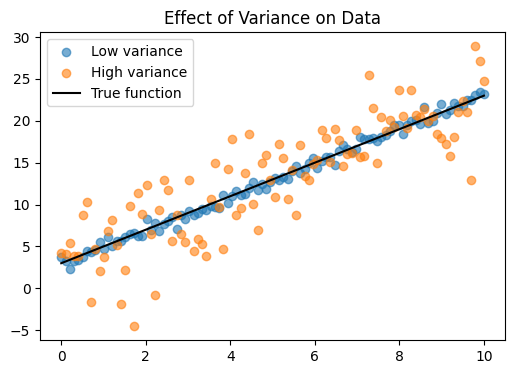

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y_low_noise, label="Low variance", alpha=0.6)
plt.scatter(x, y_high_noise, label="High variance", alpha=0.6)
plt.plot(x, y_clean, color="black", label="True function")
plt.legend()
plt.title("Effect of Variance on Data")
plt.show()


## Standardization (Z-Score) — The ML Superpower

Real datasets contain features on very different scales:
- Age: 0–100
- Salary: 0–1,000,000
- Ratings: 1–5

Gradient Descent becomes unstable when features are not comparable.

We fix this using **standardization**:

$$
z = \frac{x - \mu}{\sigma}
$$

After standardization:
- Mean = 0
- Standard deviation = 1

This makes optimization stable and predictable.


In [11]:
salary = np.array([30000, 35000, 40000, 45000, 50000])

salary_scaled = (salary - np.mean(salary)) / np.std(salary)

np.mean(salary_scaled), np.std(salary_scaled)


(np.float64(-4.4408920985006264e-17), np.float64(1.0))

## Likelihood vs Probability

In ML, we care about **how likely the observed data is**, given a model.

- **Probability**: Likelihood of an outcome, given a model
- **Likelihood**: How good the model parameters are, given observed data

Training = **maximize likelihood** of observed data.


## The Log Trick (Why Log Loss Exists)

Probabilities lie between 0 and 1.

Multiplying many probabilities:
$$
0.01 \times 0.02 \times 0.05 \times \dots
$$

Results in numbers so small computers round them to zero
(**numerical underflow**).

### The Fix
Take the logarithm:
- Multiplication → addition
- Tiny numbers → manageable numbers

This is why we minimize **negative log-likelihood**.

This is **Log Loss**.


## Direct Bridge to Logistic Regression

In Logistic Regression:
- The model outputs probabilities
- We evaluate how likely true labels are
- We take the negative log to form a loss

So when you see:
$$
-\log(y)
$$

Remember:
> We are maximizing likelihood, not inventing a random formula.


## Day 5 Summary — Reality Locked

- Mean = best baseline prediction
- Variance = uncertainty in data
- Noise is irreducible
- Loss never reaches zero
- ML is probabilistic
- Standardization stabilizes Gradient Descent
- Log Loss comes from likelihood + numerical stability

From now on:
> Non-zero loss is expected, not failure.


## Stop Condition

You proceed only if you can explain:

- Why noise cannot be learned
- Why loss plateaus
- Why standardization is required
- Why Log Loss exists
- Why ML predictions are probabilistic

If not, repeat Day 5.
